In [44]:
import numpy as np
import pandas as pd
cars_df = pd.read_csv('car.data',skip_blank_lines=True)

In [45]:
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [46]:
for i in range(len(cars_df['buying'])):
    if cars_df['buying'][i] == 'vhigh':
        cars_df['buying'][i] = 4
    elif cars_df['buying'][i] == 'high':
        cars_df['buying'][i] = 3
    elif cars_df['buying'][i] == 'med' :
        cars_df['buying'][i] = 2
    elif cars_df['buying'][i] == 'low':
        cars_df['buying'][i] = 1
print(cars_df['buying'].head())
# print(len(cars_df['buying']))

0    4
1    4
2    4
3    4
4    4
Name: buying, dtype: object


In [47]:
for i in range(len(cars_df['doors'])):
    if cars_df['maint'][i] == 'vhigh':
        cars_df['maint'][i] = 4
    elif cars_df['maint'][i] == 'high':
        cars_df['maint'][i] = 3
    elif cars_df['maint'][i] == 'med' :
        cars_df['maint'][i] = 2
    elif cars_df['maint'][i] == 'low':
        cars_df['maint'][i] = 1
print(cars_df['maint'].head())

0    4
1    4
2    4
3    4
4    4
Name: maint, dtype: object


In [48]:
for i in range(len(cars_df['doors'])):
    if cars_df['doors'][i] == '5more':
        cars_df['doors'][i] = 4
    elif cars_df['doors'][i] == '4':
        cars_df['doors'][i] = 3
    elif cars_df['doors'][i] == '3' :
        cars_df['doors'][i] = 2
    elif cars_df['doors'][i] == '2':
        cars_df['doors'][i] = 1
print(cars_df['doors'].head())

0    1
1    1
2    1
3    1
4    1
Name: doors, dtype: object


In [49]:
for i in range(len(cars_df['persons'])):
    if cars_df['persons'][i] == 'more':
        cars_df['persons'][i] = 3
    elif cars_df['persons'][i] == '4':
        cars_df['persons'][i] = 2
    elif cars_df['persons'][i] == '2' :
        cars_df['persons'][i] = 1
print(cars_df['persons'].head())

0    1
1    1
2    1
3    1
4    1
Name: persons, dtype: object


In [50]:
for i in range(len(cars_df['lug_boot'])):
    if cars_df['lug_boot'][i] == 'big':
        cars_df['lug_boot'][i] = 3
    elif cars_df['lug_boot'][i] == 'med':
        cars_df['lug_boot'][i] = 2
    elif cars_df['lug_boot'][i] == 'small' :
        cars_df['lug_boot'][i] = 1
print(cars_df['lug_boot'].head())

0    1
1    1
2    1
3    2
4    2
Name: lug_boot, dtype: object


In [51]:
for i in range(len(cars_df['safety'])):
    if cars_df['safety'][i] == 'high':
        cars_df['safety'][i] = 3
    elif cars_df['safety'][i] == 'med':
        cars_df['safety'][i] = 2
    elif cars_df['safety'][i] == 'low' :
        cars_df['safety'][i] = 1
print(cars_df['safety'].head())

0    1
1    2
2    3
3    1
4    2
Name: safety, dtype: object


In [52]:
for i in range(len(cars_df['class'])):
    if cars_df['class'][i] == 'vgood':
        cars_df['class'][i] = 4
    elif cars_df['class'][i] == 'good':
        cars_df['class'][i] = 3
    elif cars_df['class'][i] == 'acc' :
        cars_df['class'][i] = 2
    elif cars_df['class'][i] == 'unacc':
        cars_df['class'][i] = 1
print(cars_df['class'].head())

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: object


In [54]:
# cars_df=np.asarray(cars_df)
# np.random.shuffle(cars_df)
# np.random.shuffle(cars1)
from sklearn.utils import shuffle
cars_df = shuffle(cars_df)
print(cars_df.head())
cars_train = cars_df[:1200]
cars_test = cars_df[1200:]

     buying maint doors persons lug_boot safety class
643       3     3     4       3        2      2     2
159       4     3     2       3        3      1     1
1518      1     2     1       1        3      1     1
455       3     4     1       3        2      3     1
323       4     2     4       3        3      3     2


In [56]:
X=cars_train[['buying','maint','doors','persons','lug_boot','safety']].astype('int')
y=cars_train['class'].astype('int')
# y=cars_train[:,6]
# X=np.delete(cars_train,6,1)

type(X)


pandas.core.frame.DataFrame

In [60]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced', solver='lbfgs', max_iter=100, multi_class='auto')
lr.fit(X,y)

/Users/sunqingyu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
X_test=cars_test[['buying','maint','doors','persons','lug_boot','safety']].astype('int')
result= lr.predict(X_test)

In [62]:
from sklearn.metrics import classification_report
y_test=cars_test['class'].astype('int')
#print(100.*np.mean(result==y_test))
print(classification_report(result, y_test))

              precision    recall  f1-score   support

           1       0.81      0.93      0.87       326
           2       0.69      0.66      0.67       125
           3       1.00      0.33      0.50        51
           4       0.94      0.65      0.77        26

    accuracy                           0.80       528
   macro avg       0.86      0.64      0.70       528
weighted avg       0.81      0.80      0.78       528



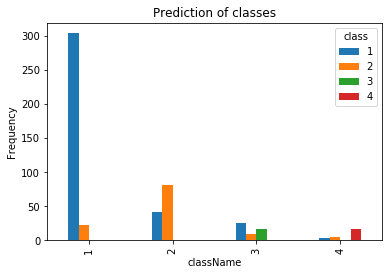

In [64]:
import matplotlib.pyplot as plt
# %matplotlib inline
pd.crosstab(result,y_test).plot(kind='bar')
plt.title('Prediction of classes')
plt.xlabel('className')
plt.ylabel('Frequency')
plt.savefig('predict_jpb')